<a href="https://colab.research.google.com/github/nastyabekesheva/Mathematical-Modeling/blob/main/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade "git+https://github.com/lisphilar/covid19-sir.git#egg=covsirphy"

  Cloning https://github.com/lisphilar/covid19-sir.git to /tmp/pip-install-pfypxpzj/covsirphy_5635007924b84194938b47aff55ad937
  Running command git clone --filter=blob:none --quiet https://github.com/lisphilar/covid19-sir.git /tmp/pip-install-pfypxpzj/covsirphy_5635007924b84194938b47aff55ad937
  Resolved https://github.com/lisphilar/covid19-sir.git to commit 4f7819d745e8c7a0092c6a0e8843e2aa3f706e2c
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 808.2/808.2 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.1/45.1 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 kB 27.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━

In [2]:
import covsirphy as cs
from datetime import timedelta
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
from matplotlib.ticker import ScalarFormatter

In [3]:
country = "Japan"
scenario = cs.ODEScenario.auto_build(geo=country, model=cs.SIRFModel)

  0%|          | 0/68 [00:00<?, ?it/s]

In [4]:
scenario.summary()

Start        End    Rt     theta     kappa       rho  \
Scenario Phase                                                             
Baseline 0th   2020-02-23 2020-08-10   1.5  0.030288  0.000071  0.001286   
         1st   2020-08-11 2020-11-16  0.86  0.005196  0.000009  0.000895   
         2nd   2020-11-17 2020-12-24  1.57  0.000063  0.000019  0.001196   
         3rd   2020-12-25 2021-01-16  1.34  0.000499  0.000011  0.001293   
         4th   2021-01-17 2021-02-10  0.79  0.000705  0.000014  0.000885   
...                   ...        ...   ...       ...       ...       ...   
         63rd  2023-03-12 2023-03-27   1.7  0.015584  0.000005  0.001107   
         64th  2023-03-28 2023-04-07   0.7  0.026643  0.000005  0.001299   
         65th  2023-04-08 2023-04-18  1.34  0.033746  0.000003  0.001632   
         66th  2023-04-19 2023-04-27  1.67  0.031327  0.000005  0.001495   
         67th  2023-04-28 2023-05-08  1.64  0.006964  0.000001  0.001386   

                   sigma  alpha1 [-]  1/alpha2 [day]  1/beta [day]  \
Scenario Phase                                                       
Baseline 0th    0.000759        0.03             236            13   
         1st    0.001032       0.005            1906            19   
         2nd    0.000744         0.0             885            14   
         3rd    0.000951         0.0            1574            13   
         4th    0.001109       0.001            1209            19   
...                  ...         ...             ...           ...   
         63rd   0.000638       0.016            3648            15   
         64th   0.001805       0.027            3234            13   
         65th    0.00117       0.034            5312            10   
         66th    0.00086       0.031            3145            11   
         67th   0.000839       0.007           15856            12   

                1/gamma [day]          ODE  tau  
Scenario Phase                                   
Baseline 0th               22  SIR-F Model   24  
         1st               16  SIR-F Model   24  
         2nd               22  SIR-F Model   24  
         3rd               18  SIR-F Model   24  
         4th               15  SIR-F Model   24  
...                       ...          ...  ...  
         63rd              26  SIR-F Model   24  
         64th               9  SIR-F Model   24  
         65th              14  SIR-F Model   24  
         66th              19  SIR-F Model   24  
         67th              20  SIR-F Model   24  

[68 rows x 13 columns]

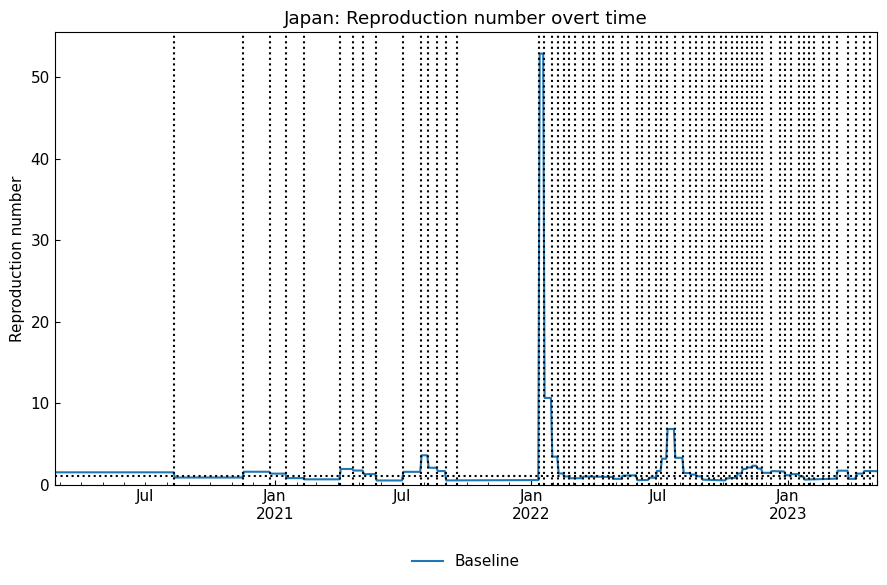

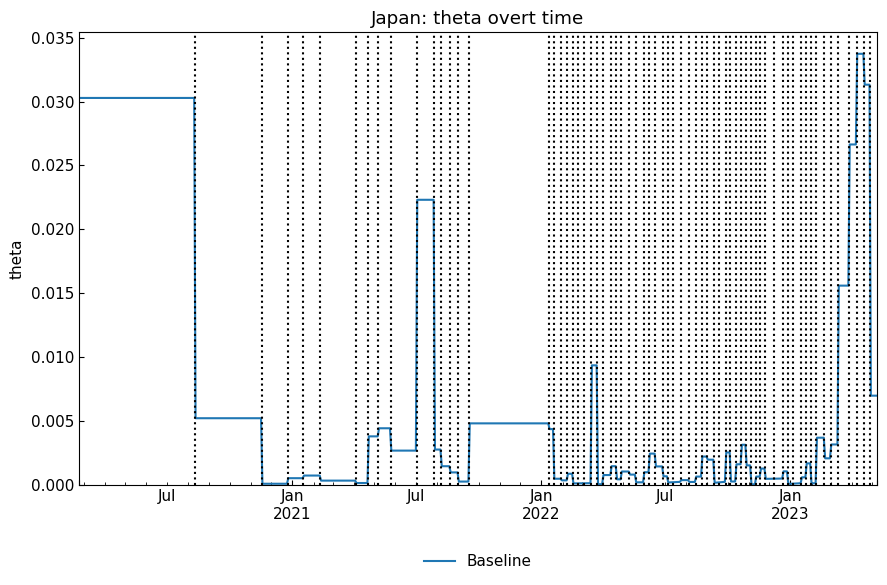

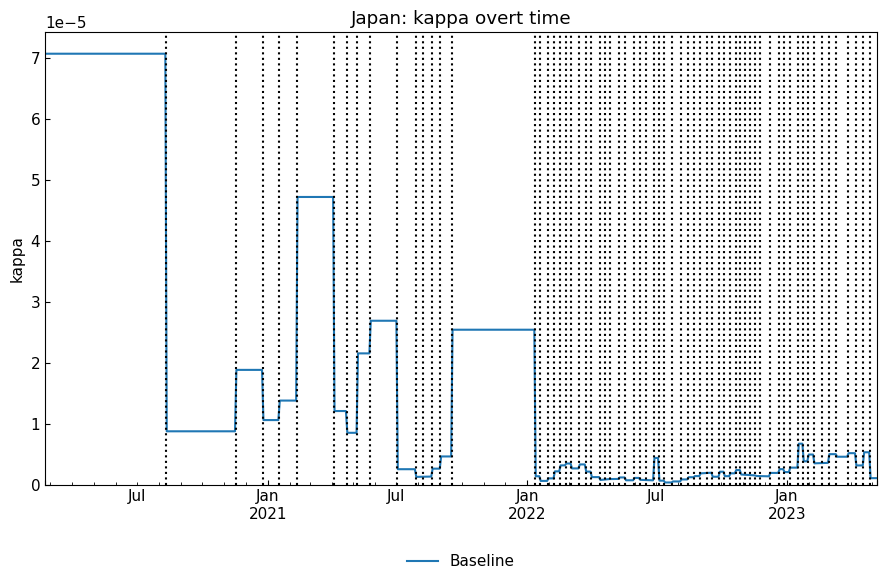

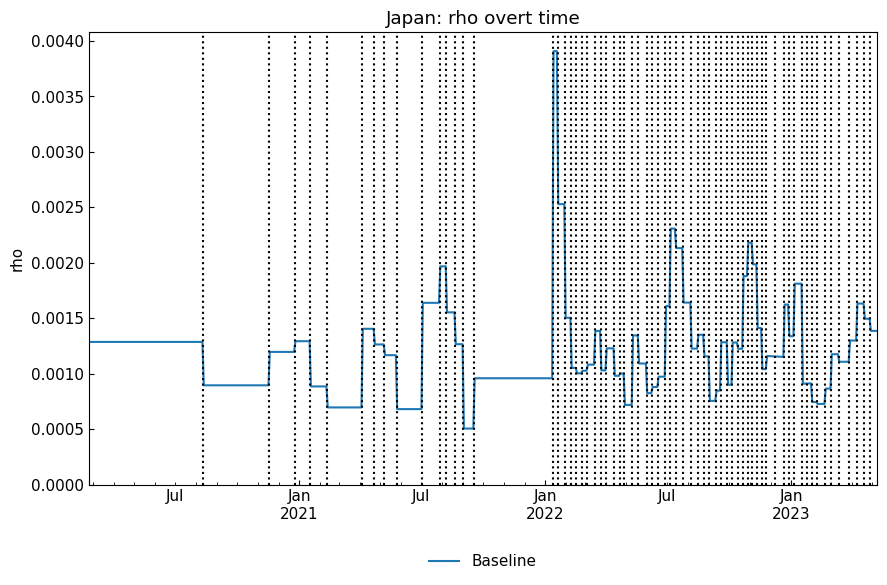

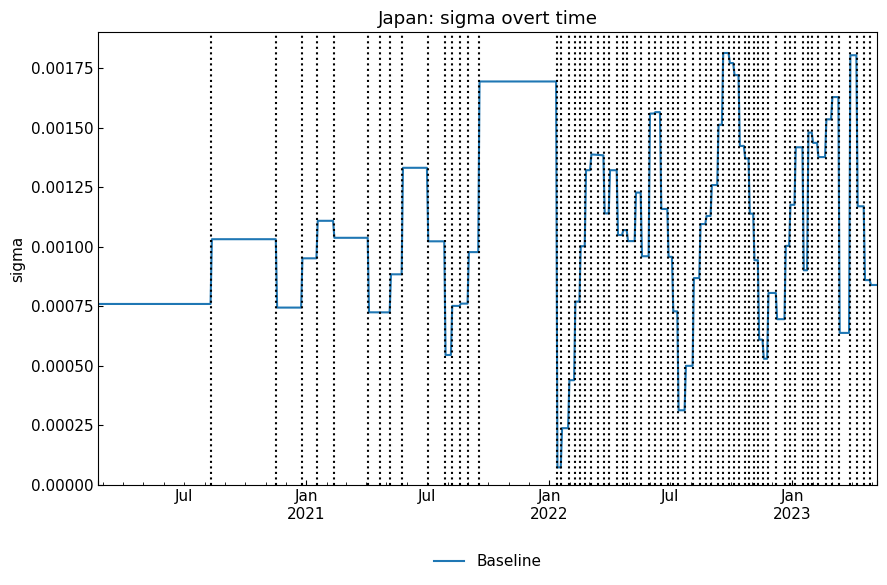

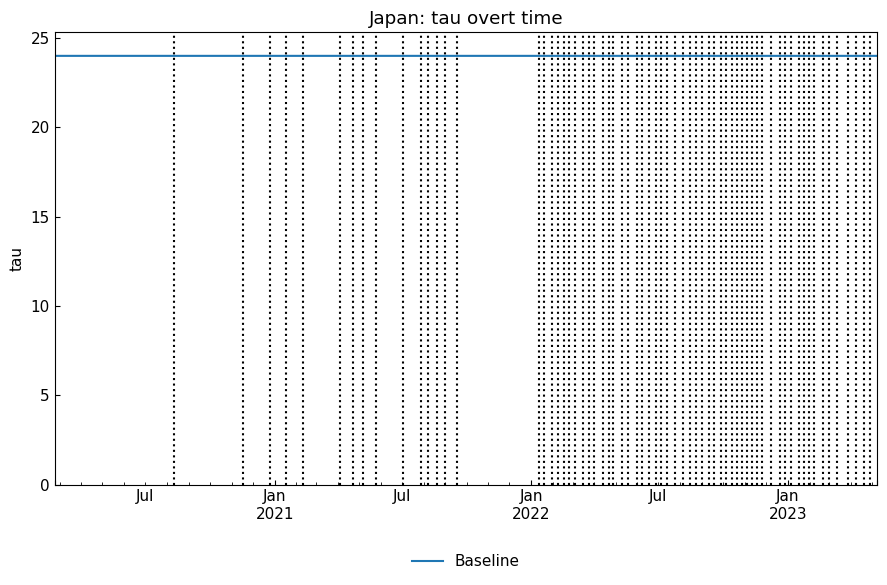

Scenario,Baseline
Date,
2020-02-23,24
2020-02-24,24
2020-02-25,24
2020-02-26,24
2020-02-27,24
...,...
2023-05-04,24
2023-05-05,24
2023-05-06,24


In [5]:
scenario.compare_param("Rt")
scenario.compare_param("theta")
scenario.compare_param("kappa")
scenario.compare_param("rho")
scenario.compare_param("sigma")
scenario.compare_param("tau")

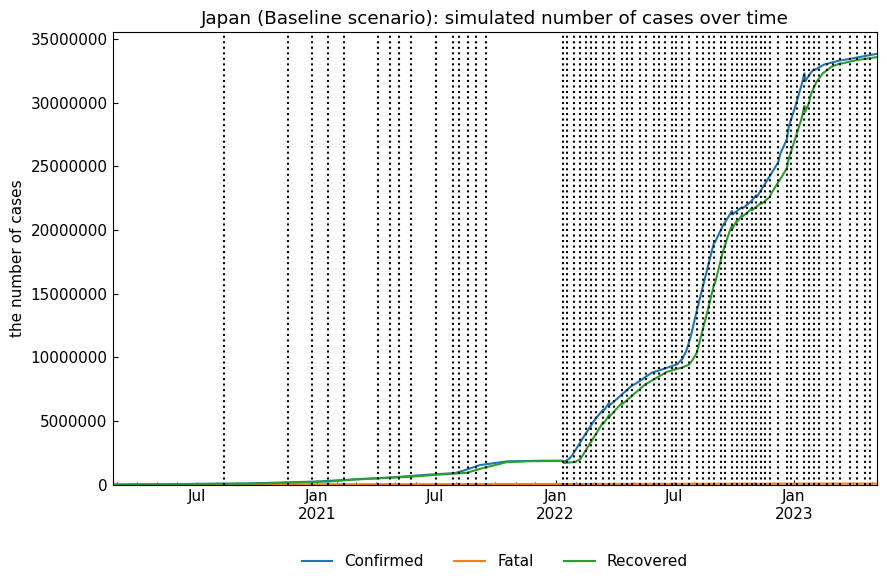

,Confirmed,Fatal,Recovered
Date,,,
2020-02-23,128.0,1.0,25.0
2020-02-24,137.0,2.0,30.0
2020-02-25,144.0,2.0,35.0
2020-02-26,152.0,3.0,39.0
2020-02-27,162.0,4.0,45.0
...,...,...,...
2023-05-04,33785867.0,75002.0,33537334.0
2023-05-05,33796495.0,75087.0,33546114.0
2023-05-06,33807229.0,75172.0,33554983.0


In [6]:
scenario.simulate(name="Baseline")

In [7]:
future_start_date = scenario.simulate(display=False).index.max() + timedelta(days=1)

scenario.build_with_template(name="Predicted", template="Baseline");
scenario.predict(days=7, name="Predicted")

df = scenario.append().summary()
df.loc[df["Start"] >= future_start_date]

Using 1 cpus for n_jobs.
Data frequency is: D, used frequency is: D
Model Number: 1 with model AverageValueNaive in generation 0 of 1 with params {"method": "Mean"} and transformations {"fillna": "fake_date", "transformations": {"0": "DifferencedTransformer", "1": "SinTrend"}, "transformation_params": {"0": {}, "1": {}}}
Model Number: 2 with model AverageValueNaive in generation 0 of 1 with params {"method": "Mean"} and transformations {"fillna": "mean", "transformations": {"0": "ClipOutliers", "1": "QuantileTransformer", "2": "DifferencedTransformer"}, "transformation_params": {"0": {"method": "clip", "std_threshold": 3, "fillna": null}, "1": {"output_distribution": "uniform", "n_quantiles": 1000}, "2": {}}}
Model Number: 3 with model AverageValueNaive in generation 0 of 1 with params {"method": "Mean"} and transformations {"fillna": "rolling_mean_24", "transformations": {"0": "SeasonalDifference", "1": "Round", "2": "Detrend"}, "transformation_params": {"0": {"lag_1": 7, "method": "M

,,Start,End,Rt,theta,kappa,rho,sigma,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],ODE,tau
Scenario,Phase,,,,,,,,,,,,,
Predicted,68th,2023-05-09,2023-05-15,1.37,0.006964,0.000001,0.001386,0.001006,0.007,15856,12,17,SIR-F Model,24


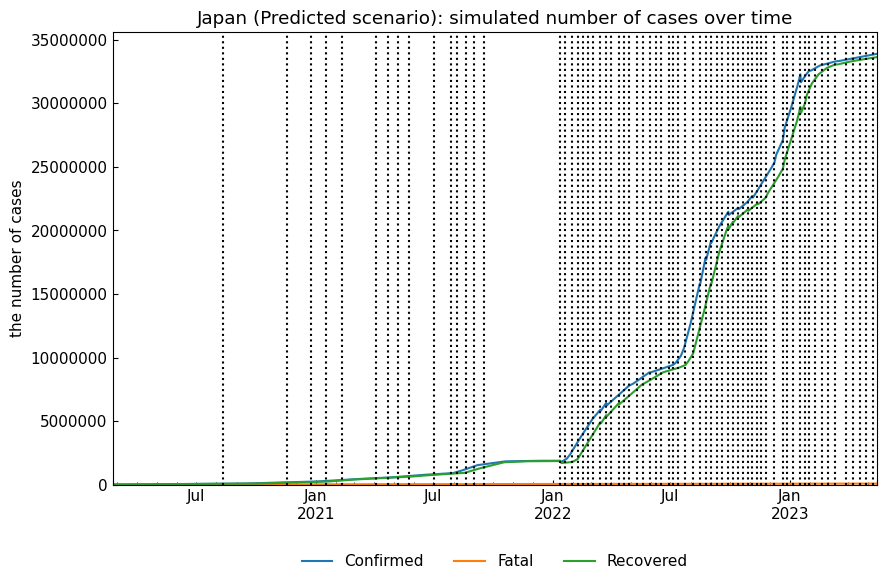

,Confirmed,Fatal,Recovered
Date,,,
2020-02-23,128.0,1.0,25.0
2020-02-24,137.0,2.0,30.0
2020-02-25,144.0,2.0,35.0
2020-02-26,152.0,3.0,39.0
2020-02-27,162.0,4.0,45.0
...,...,...,...
2023-05-11,33862315.0,75613.0,33604173.0
2023-05-12,33873430.0,75702.0,33615193.0
2023-05-13,33884542.0,75791.0,33626213.0


In [8]:
scenario.simulate(name="Predicted")

In [9]:
future_start_date = scenario.simulate(display=False).index.max() + timedelta(days=1)

scenario.build_with_template(name="Predicted", template="Baseline");
scenario.predict(days=30, name="Predicted")

df = scenario.append().summary()
df.loc[df["Start"] >= future_start_date]

Using 1 cpus for n_jobs.
Data frequency is: D, used frequency is: D
Model Number: 1 with model AverageValueNaive in generation 0 of 1 with params {"method": "Mean"} and transformations {"fillna": "fake_date", "transformations": {"0": "DifferencedTransformer", "1": "SinTrend"}, "transformation_params": {"0": {}, "1": {}}}
Model Number: 2 with model AverageValueNaive in generation 0 of 1 with params {"method": "Mean"} and transformations {"fillna": "mean", "transformations": {"0": "ClipOutliers", "1": "QuantileTransformer", "2": "DifferencedTransformer"}, "transformation_params": {"0": {"method": "clip", "std_threshold": 3, "fillna": null}, "1": {"output_distribution": "uniform", "n_quantiles": 1000}, "2": {}}}
Model Number: 3 with model AverageValueNaive in generation 0 of 1 with params {"method": "Mean"} and transformations {"fillna": "rolling_mean_24", "transformations": {"0": "SeasonalDifference", "1": "Round", "2": "Detrend"}, "transformation_params": {"0": {"lag_1": 7, "method": "M

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:3256: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda


Model Number: 12 with model SeasonalNaive in generation 0 of 1 with params {"method": "LastValue", "lag_1": 7, "lag_2": 2} and transformations {"fillna": "mean", "transformations": {"0": "QuantileTransformer", "1": "ClipOutliers"}, "transformation_params": {"0": {"output_distribution": "uniform", "n_quantiles": 1000}, "1": {"method": "clip", "std_threshold": 2, "fillna": null}}}
Model Number: 13 with model ConstantNaive in generation 0 of 1 with params {} and transformations {"fillna": "ffill", "transformations": {"0": "PowerTransformer", "1": "QuantileTransformer", "2": "SeasonalDifference"}, "transformation_params": {"0": {}, "1": {"output_distribution": "uniform", "n_quantiles": 1000}, "2": {"lag_1": 7, "method": "LastValue"}}}
Model Number: 14 with model SeasonalNaive in generation 0 of 1 with params {"method": "lastvalue", "lag_1": 364, "lag_2": 28} and transformations {"fillna": "ffill", "transformations": {"0": "SeasonalDifference", "1": "MaxAbsScaler", "2": "Round"}, "transform

,,Start,End,Rt,theta,kappa,rho,sigma,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],ODE,tau
Scenario,Phase,,,,,,,,,,,,,
Predicted,68th,2023-05-16,2023-06-14,1.26,0.006972,0.000001,0.001386,0.001095,0.007,14632,12,15,SIR-F Model,24


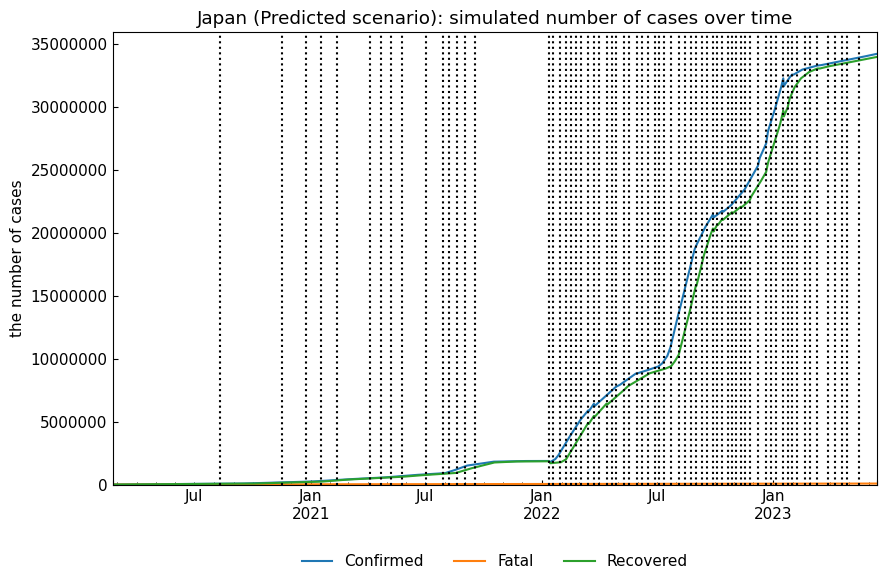

,Confirmed,Fatal,Recovered
Date,,,
2020-02-23,128.0,1.0,25.0
2020-02-24,137.0,2.0,30.0
2020-02-25,144.0,2.0,35.0
2020-02-26,152.0,3.0,39.0
2020-02-27,162.0,4.0,45.0
...,...,...,...
2023-06-10,34198896.0,78333.0,33949642.0
2023-06-11,34209237.0,78417.0,33960842.0
2023-06-12,34219519.0,78500.0,33971980.0


In [10]:
scenario.simulate(name="Predicted")

In [11]:
future_start_date = scenario.simulate(display=False).index.max() + timedelta(days=1)

scenario.build_with_template(name="Predicted", template="Baseline");
scenario.predict(days=100, name="Predicted")

df = scenario.append().summary()
df.loc[df["Start"] >= future_start_date]

Using 1 cpus for n_jobs.
Data frequency is: D, used frequency is: D
Model Number: 1 with model AverageValueNaive in generation 0 of 1 with params {"method": "Mean"} and transformations {"fillna": "fake_date", "transformations": {"0": "DifferencedTransformer", "1": "SinTrend"}, "transformation_params": {"0": {}, "1": {}}}
Model Number: 2 with model AverageValueNaive in generation 0 of 1 with params {"method": "Mean"} and transformations {"fillna": "mean", "transformations": {"0": "ClipOutliers", "1": "QuantileTransformer", "2": "DifferencedTransformer"}, "transformation_params": {"0": {"method": "clip", "std_threshold": 3, "fillna": null}, "1": {"output_distribution": "uniform", "n_quantiles": 1000}, "2": {}}}
Model Number: 3 with model AverageValueNaive in generation 0 of 1 with params {"method": "Mean"} and transformations {"fillna": "rolling_mean_24", "transformations": {"0": "SeasonalDifference", "1": "Round", "2": "Detrend"}, "transformation_params": {"0": {"lag_1": 7, "method": "M

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:3256: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda


Model Number: 12 with model SeasonalNaive in generation 0 of 1 with params {"method": "LastValue", "lag_1": 7, "lag_2": 2} and transformations {"fillna": "mean", "transformations": {"0": "QuantileTransformer", "1": "ClipOutliers"}, "transformation_params": {"0": {"output_distribution": "uniform", "n_quantiles": 1000}, "1": {"method": "clip", "std_threshold": 2, "fillna": null}}}
Model Number: 13 with model ConstantNaive in generation 0 of 1 with params {} and transformations {"fillna": "ffill", "transformations": {"0": "PowerTransformer", "1": "QuantileTransformer", "2": "SeasonalDifference"}, "transformation_params": {"0": {}, "1": {"output_distribution": "uniform", "n_quantiles": 1000}, "2": {"lag_1": 7, "method": "LastValue"}}}
Model Number: 14 with model SeasonalNaive in generation 0 of 1 with params {"method": "lastvalue", "lag_1": 364, "lag_2": 28} and transformations {"fillna": "ffill", "transformations": {"0": "SeasonalDifference", "1": "MaxAbsScaler", "2": "Round"}, "transform

Start        End    Rt     theta     kappa       rho  \
Scenario  Phase                                                             
Predicted 68th  2023-06-15 2023-06-17  1.25  0.006949  0.000001  0.001302   
          69th  2023-06-18 2023-06-20   1.2  0.006874  0.000001  0.001246   
          70th  2023-06-21 2023-06-24  1.18  0.006804  0.000001  0.001222   
          71st  2023-06-25 2023-07-06  1.17  0.009272  0.000001  0.001215   
          72nd  2023-07-07 2023-07-16  1.16  0.010326  0.000001  0.001215   
          73rd  2023-07-17 2023-08-11  1.17  0.005419  0.000001  0.001217   
          74th  2023-08-12 2023-09-22  1.18  0.002683       0.0  0.001219   

                    sigma  alpha1 [-]  1/alpha2 [day]  1/beta [day]  \
Scenario  Phase                                                       
Predicted 68th   0.001032       0.007           15857            13   
          69th   0.001032       0.007           15553            13   
          70th   0.001032       0.007           15557            14   
          71st   0.001032       0.009           18979            14   
          72nd   0.001032        0.01           21183            14   
          73rd   0.001032       0.005           26963            14   
          74th   0.001032       0.003           42515            14   

                 1/gamma [day]          ODE  tau  
Scenario  Phase                                   
Predicted 68th              16  SIR-F Model   24  
          69th              16  SIR-F Model   24  
          70th              16  SIR-F Model   24  
          71st              16  SIR-F Model   24  
          72nd              16  SIR-F Model   24  
          73rd              16  SIR-F Model   24  
          74th              16  SIR-F Model   24

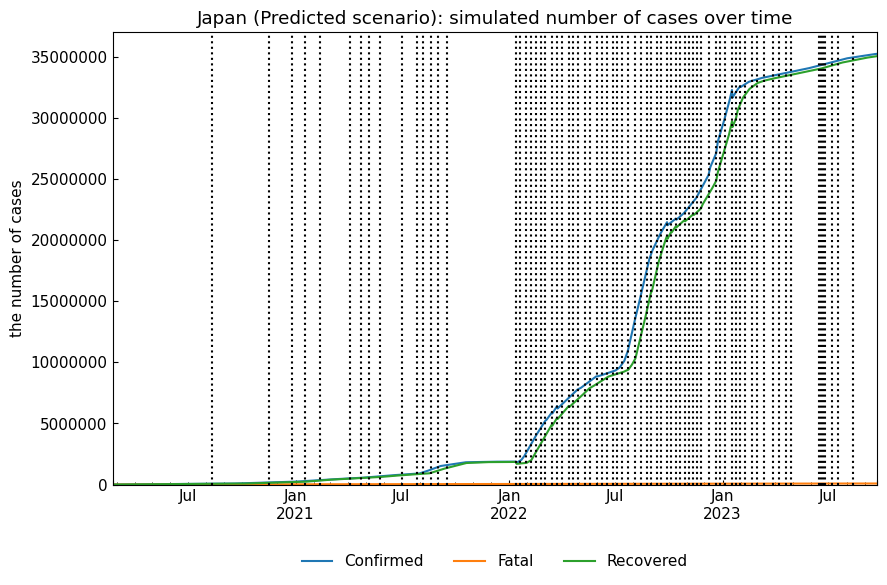

,Confirmed,Fatal,Recovered
Date,,,
2020-02-23,128.0,1.0,25.0
2020-02-24,137.0,2.0,30.0
2020-02-25,144.0,2.0,35.0
2020-02-26,152.0,3.0,39.0
2020-02-27,162.0,4.0,45.0
...,...,...,...
2023-09-18,35232866.0,85557.0,35036622.0
2023-09-19,35238681.0,85575.0,35043440.0
2023-09-20,35244443.0,85593.0,35050196.0


In [12]:
scenario.simulate(name="Predicted")